In [1]:
!pip install ../dist/rekomenda-0.1.0-py3-none-any.whl --quiet

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from collections import Counter

from rekomenda.coo import COOMatrix
from rekomenda.csr import CSRMatrix
from rekomenda.csc import CSCMatrix
from rekomenda.als import ALSMetrics, BiasOnlyALS, LatentFactorALS
from rekomenda.utils import load_data

## Whole data 

In [3]:
dataset_coo = load_data(filepath='../ml-latest-small/ratings.csv')

In [4]:
dataset_csr, dataset_csc = CSRMatrix.from_coo(dataset_coo), CSCMatrix.from_coo(dataset_coo)

In [5]:
whole_als = BiasOnlyALS(lambda_reg=0.1)

In [6]:
whole_als.fit(dataset_csr, dataset_csc,n_iterations=20,verbose=True)

Iteration 1/20 - RMSE: 0.8044, NLL: 32878.1378
Iteration 2/20 - RMSE: 0.7874, NLL: 31547.7276
Iteration 3/20 - RMSE: 0.7861, NLL: 31458.7155
Iteration 4/20 - RMSE: 0.7859, NLL: 31450.7086
Iteration 5/20 - RMSE: 0.7859, NLL: 31449.5685
Converged at iteration 5


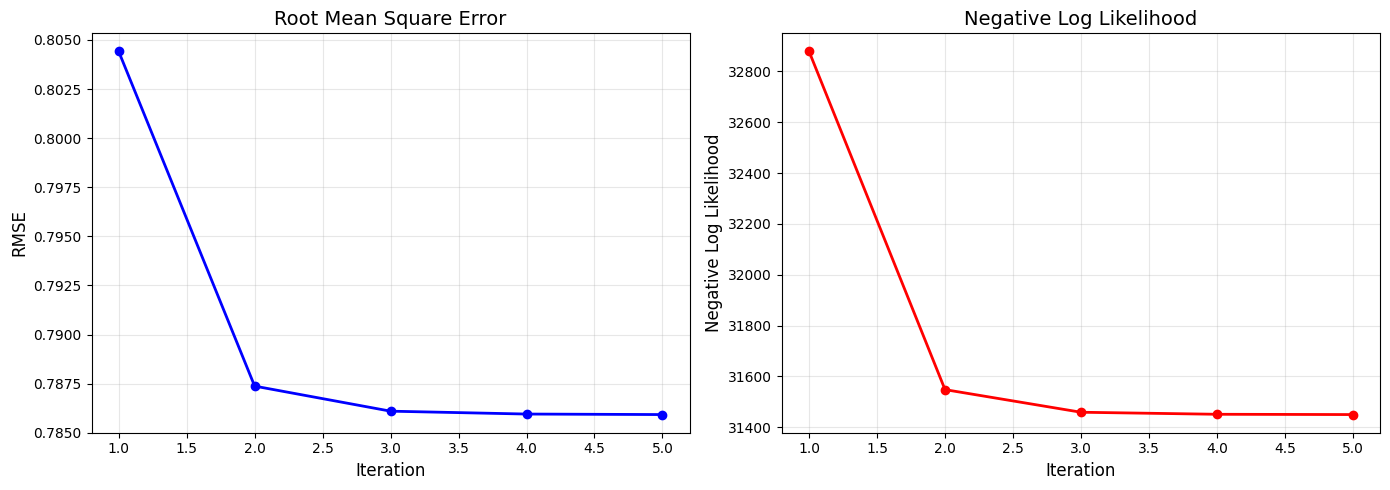

In [8]:
whole_als.plot_metrics(output='pics/als-bias-only-whole.pdf')

## Train/Test Splitted Data

In [9]:
train, test  = load_data(filepath='../ml-latest-small/ratings.csv', split_ratio=0.8)

In [10]:
train_csr, test_csr = CSRMatrix.from_coo(train), CSRMatrix.from_coo(test)

In [11]:
train_csc, test_csc = CSCMatrix.from_coo(train), CSCMatrix.from_coo(test)

In [12]:
train_als = BiasOnlyALS(lambda_reg=0.1)

In [13]:
train_als.fit(csr_matrix=train_csr, csc_matrix=train_csc,n_iterations=20)

Iteration 1/20 - RMSE: 0.7963, NLL: 25805.5251
Iteration 2/20 - RMSE: 0.7793, NLL: 24755.5344
Iteration 3/20 - RMSE: 0.7779, NLL: 24679.2169
Iteration 4/20 - RMSE: 0.7777, NLL: 24671.7789
Iteration 5/20 - RMSE: 0.7777, NLL: 24670.6445
Converged at iteration 5


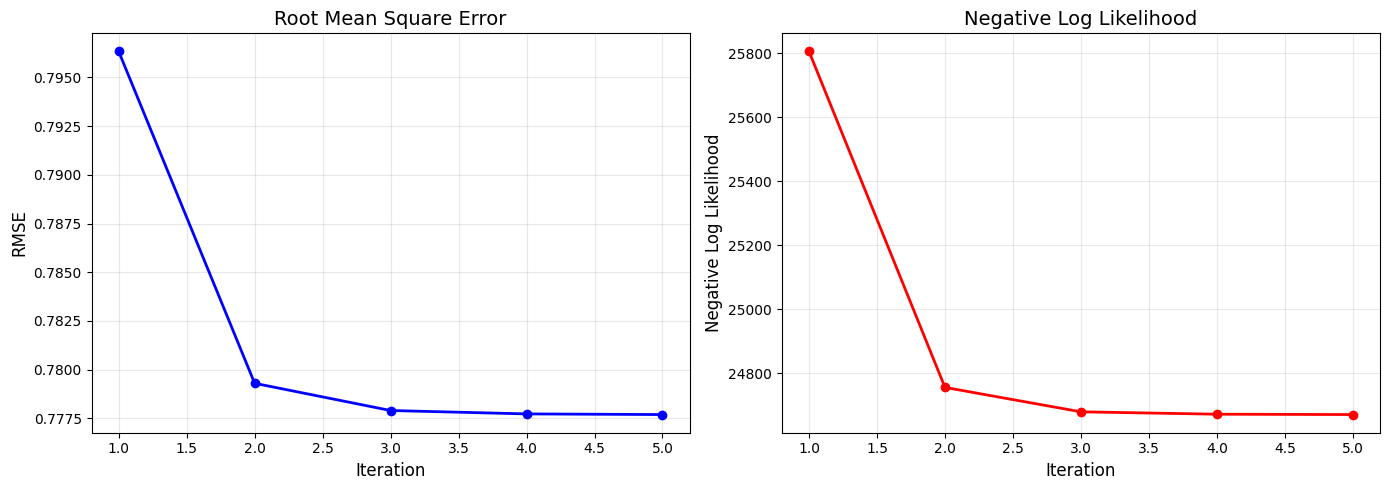

In [14]:
train_als.plot_metrics(output='pics/als-bias-only-train.pdf')

In [15]:
test_als = BiasOnlyALS(lambda_reg=0.1)

In [16]:
test_als.fit(csr_matrix=test_csr, csc_matrix=test_csc,n_iterations=10)

Iteration 1/10 - RMSE: 0.7279, NLL: 5495.2796
Iteration 2/10 - RMSE: 0.7088, NLL: 5232.1333
Iteration 3/10 - RMSE: 0.7059, NLL: 5197.1844
Iteration 4/10 - RMSE: 0.7052, NLL: 5190.8699
Iteration 5/10 - RMSE: 0.7050, NLL: 5189.3847
Iteration 6/10 - RMSE: 0.7050, NLL: 5188.8524
Converged at iteration 6


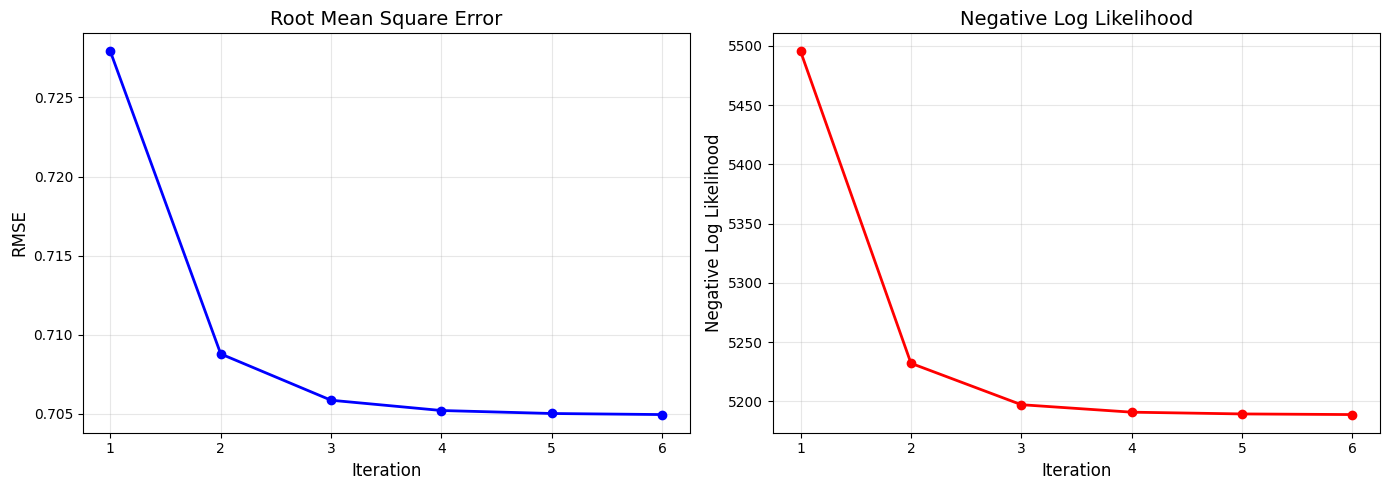

In [17]:
test_als.plot_metrics(output='pics/als-bias-only-test.pdf')

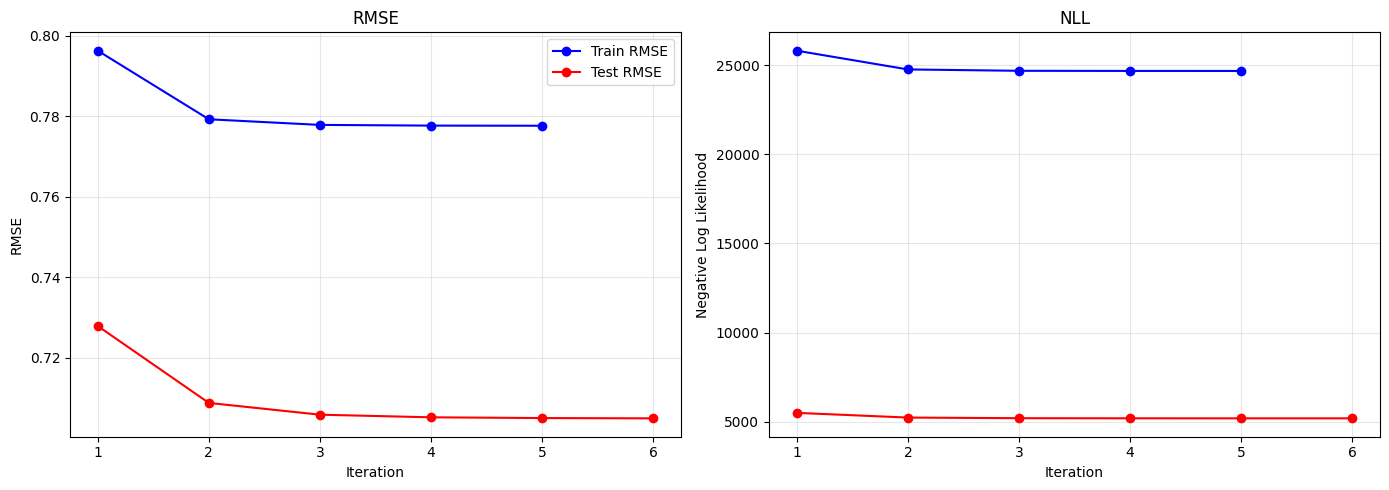

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(train_als.metrics.iterations, train_als.metrics.rmse, "b-o", label="Train RMSE")
ax1.plot(test_als.metrics.iterations, test_als.metrics.rmse, "r-o", label="Test RMSE")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("RMSE")
ax1.set_title("RMSE")
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(train_als.metrics.iterations, train_als.metrics.neg_log_likelihood, "b-o")
ax2.plot(test_als.metrics.iterations, test_als.metrics.neg_log_likelihood, "r-o")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Negative Log Likelihood")
ax2.set_title("NLL")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pics/als-bias-only-train-test.pdf', format="pdf")
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
ax.plot(
    train_als.metrics.iterations, train_als.metrics.neg_log_likelihood, "b-o", linewidth=2
)
ax.plot(
    test_als.metrics.iterations, test_als.metrics.neg_log_likelihood, "r-o", linewidth=2
)
ax.set_xlabel("Iteration", fontsize=12)
ax.set_ylabel("Negative Log Likelihood", fontsize=12)
ax.set_title("Negative Log Likelihood", fontsize=14)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('pics/als-bias-only-train-test-rmse.pdf', format="pdf")
plt.show()